In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error

In [42]:
## Iris dataset model trainingl
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [83]:
data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [45]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [48]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [50]:
y = label_encoder.fit_transform(y)

In [53]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [67]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [68]:
mse = mean_squared_error(y_pred=y_pred,y_true=y_test)

In [69]:
print(mse)

0.05016111450416499


In [70]:
r2 = r2_score(y_pred=y_pred,y_true=y_test)

In [71]:
print(r2*100)

91.95276237901096


In [66]:
model

LinearRegression()

In [95]:
def prediction():
    sepal_len = float(input("Enter sepal length"))
    sepal_width = float(input("Enter sepal length"))
    petal_len = float(input("Enter petal length"))
    petal_width = float(input("Enter petal length"))
    value = np.array([[sepal_len,sepal_width,petal_len,petal_width]])
    result = model.predict(value)
    return result
result = np.round(prediction())
print(result)
if(result == 1):
    print('setosa')
elif(result==2):
    print('versicolor')
else:
    print('virginica')

[3.]
virginica


c:\Users\Prasanna dindi\OneDrive\Desktop\udemy course\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [97]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train,y_train,0.3)
y_pred = model2.predict(X_test)

In [99]:
print(y_pred)

[2 1 2 1 0 1 0 1 0 1 1 2 2 2 1 0 0 0 0 0 1 1 0 1 0 2 1 1 0 2]


In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)

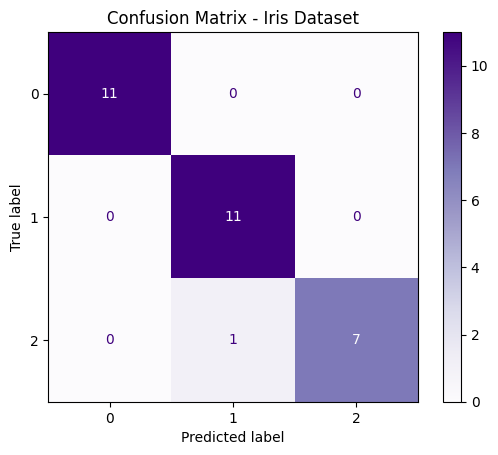

In [101]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title("Confusion Matrix - Iris Dataset")
plt.show()